In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Creating data using sklearn

In [11]:
data = make_regression(n_samples = 1000,                 # number of samples
                      n_features = 3,                    # number of features
                   n_informative = 3,                    # number of useful features

                    random_state = 42)                   # set for same data points for each run



In [12]:
X = data[0]

In [13]:
y = data[1]

In [14]:
X.shape

(1000, 3)

In [15]:
X

array([[-0.5391227 , -0.60787526, -0.83726243],
       [-1.4066611 , -0.6115178 , -0.75538293],
       [ 0.68189149,  1.04416088, -0.48943944],
       ...,
       [ 0.6404798 , -0.46649538,  0.99657051],
       [-1.13883312,  0.62220714,  0.30047436],
       [-0.95643638, -1.29327296,  0.71975794]])

# Transforming Data features into Data Frames with columns Research, Salaries, Infrastructure and Expenditures

In [16]:
Research = X[:,0]

In [17]:
Salaries = X[:,1]

In [18]:
Infrastructure = X[:,2]

In [19]:
# Scale Research from 0 to 2000
Research = np.interp(Research, (Research.min(), Research.max()), (0, 2000))

In [20]:
Research

array([ 721.85725078,  469.3812216 , 1077.20384662,  883.30118835,
       1258.68382597,  632.07253378,  678.18443513,  987.61595201,
        789.13110933,  561.42161938,  968.21912167, 1286.65716066,
       1086.54839437,  774.09434828,  423.5212309 , 1416.74866013,
       1117.53730937,  856.65214553,  932.1130991 ,   49.75654065,
       1144.63252014,  809.91216603,  985.44538759,  638.01032823,
        414.65616234,  824.29204682, 1146.27515933, 1036.88766915,
       1193.57784574,  431.86479088,  235.25849443,  168.99720889,
        667.14019407,  708.61702536,  949.67510909,  819.50871959,
       1388.71170602, 1010.40770109, 1184.04456854,  564.14053841,
        965.06697712,  619.88422872, 1013.58475197,  567.09853666,
        984.58209938, 1131.70223536,  446.41949899, 1287.00514541,
        670.45124859, 1217.26647748, 1159.5525403 , 1288.9122749 ,
        786.77050433, 1281.61491381, 1076.03503762,  806.86500587,
        738.26504534,  666.02873758,  632.44425332, 1074.13311

In [21]:
Salaries = np.interp(Salaries, (Salaries.min(), Salaries.max()), (0, 1500))

In [22]:
Infrastructure = np.interp(Infrastructure, (Infrastructure.min(), Infrastructure.max()), (0, 2500))

In [23]:
y = np.interp(y, (y.min(), y.max()), (6000, 20000))

In [24]:
Expenditures = y

In [25]:
df = pd.DataFrame(index = ['Research', 'Salaries','Infrastructure', 'Expenditures'],
                        data = [Research, Salaries, Infrastructure, Expenditures]).T


In [26]:
df

,Research,Salaries,Infrastructure,Expenditures
0,721.857251,613.903942,765.705784,10160.329845
1,469.381222,613.054782,795.516457,9906.531892
2,1077.203847,999.031362,892.341111,13652.741259
3,883.301188,427.943743,935.641612,9755.080727
4,1258.683826,945.261280,1371.053555,15239.327596
...,...,...,...,...
995,944.144896,662.449234,1699.288797,14085.407676
996,835.747970,637.154467,626.099384,9981.171495
997,1065.151976,646.862827,1433.367330,13213.698646
998,547.326065,900.664293,1179.932777,13274.638267


# Visualize and Inspect each feature

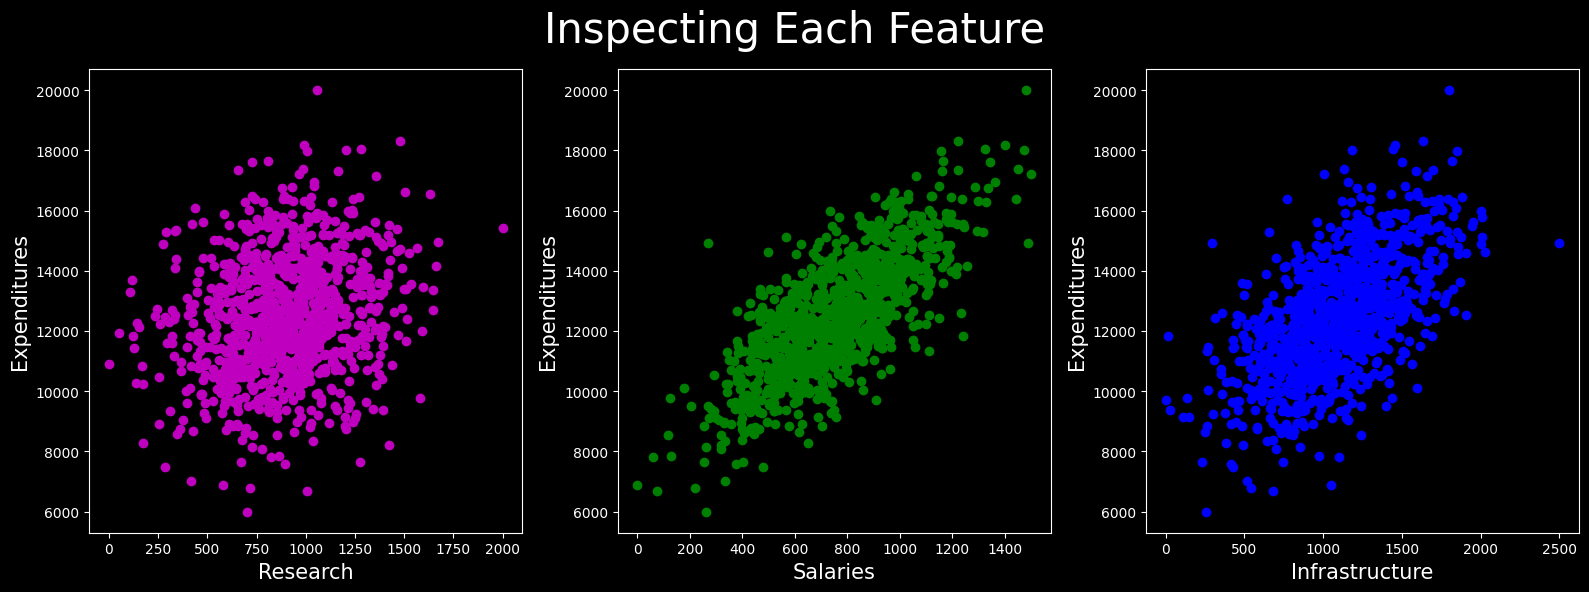

In [27]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
plt.suptitle('Inspecting Each Feature', fontsize = 30)

axes[0].plot(df['Research'],df['Expenditures'],'mo')
axes[0].set_ylabel("Expenditures", fontsize = 15)
axes[0].set_xlabel("Research", fontsize = 15)

axes[1].plot(df['Salaries'],df['Expenditures'],'go')
axes[1].set_ylabel("Expenditures", fontsize = 15)
axes[1].set_xlabel("Salaries", fontsize = 15)

axes[2].plot(df['Infrastructure'],df['Expenditures'],'bo')
axes[2].set_ylabel("Expenditures", fontsize = 15)
axes[2].set_xlabel("Infrastructure", fontsize = 15)

plt.tight_layout();

# Extract Features and Targets

In [28]:
X = df.iloc[:,:-1].values

In [29]:
X

array([[ 721.85725078,  613.90394182,  765.70578445],
       [ 469.3812216 ,  613.05478187,  795.51645662],
       [1077.20384662,  999.03136166,  892.34111134],
       ...,
       [1065.15197636,  646.86282674, 1433.36732978],
       [ 547.32606549,  900.66429282, 1179.93277677],
       [ 600.4082175 ,  454.12205772, 1332.585463  ]])

In [30]:
y = df.iloc[:,-1].values

In [31]:
y = y.reshape(-1,1)

# Splitting data into test and train

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
X_test.shape

(200, 3)

In [34]:
X_train.shape

(800, 3)

In [35]:
y_train.shape

(800, 1)

In [ ]:
X_train

# Data Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create Neural Network for Multiple Regression

In [37]:
model = Sequential()

model.add(Dense(units = 1, input_shape =(3,), activation = None))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the model

In [39]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01) ,loss='mse')

# Train the model

In [40]:
hist = model.fit(X_train,y_train, epochs = 1000) # Default Batch size = 32, therefore iterations = 800/32 = 25

Epoch 1/1000
25/25 [==============================] - 1s 2ms/step - loss: 102769328.0000
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 37456772.0000
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 13649832.0000
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 4972370.0000
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 1812949.6250
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 660881.5000
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 241029.6875
Epoch 8/1000
25/25 [==============================] - 0s 4ms/step - loss: 87848.5312
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 32063.0703
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 11697.8320
Epoch 11/1000
25/25 [==============================] - 0s 2ms/step - loss: 4274.3618
Epoch 12/1000
25/25 [===========================

# Plot Loss Vs Epochs

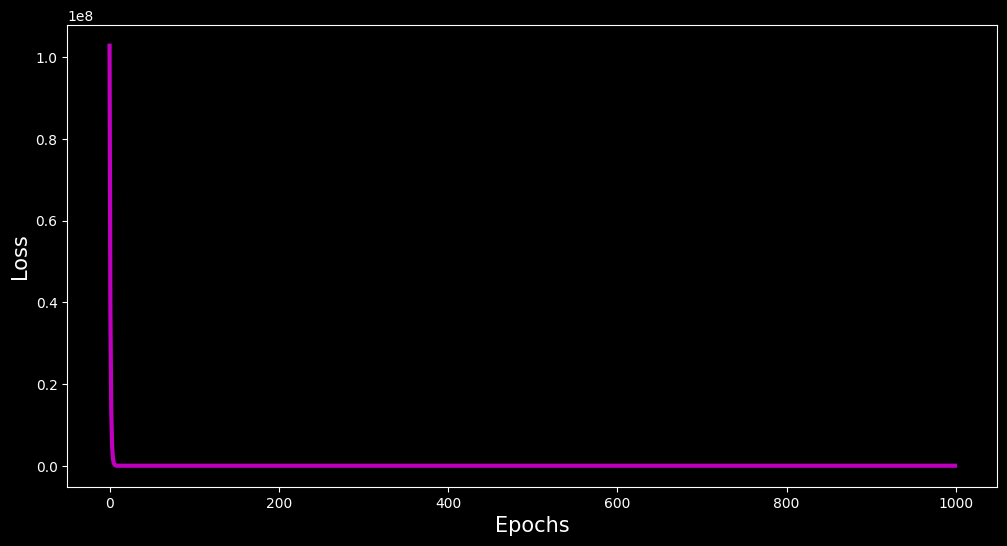

In [41]:
plt.figure(figsize =(12,6))
plt.plot(hist.history['loss'],'m', lw = 3, label= 'Training Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

# Weight and Bias Values

In [42]:
print("Weights are :" )
print(model.layers[0].get_weights()[0])

print(" ")

print("Bias is :" )
print(model.layers[0].get_weights()[1])

Weights are :
[[ 409.54196]
 [1557.3394 ]
 [1229.1174 ]]
 
Bias is :
[12483.43]


# Testing and evaluating the model

In [43]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [44]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 0.021099977899385888
MAE: 0.14524676979828188
R2: 0.9999999998961367


# Further Evaluating the model

In [45]:
test_data = X_test[113,:].reshape(1,3)
test_data.shape

(1, 3)

In [46]:
test_label = y_test[113]
test_label

array([11080.38932656])

In [47]:
y_t = model.predict(test_data)

1/1 [==============================] - 0s 31ms/step


In [48]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_label, y_t)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(test_label, y_t)))
print('R2:', metrics.r2_score(test_label, y_t))

RMSE: 0.021162499906495214
MAE: 0.14547336493838042
R2: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
